# Modeling

### Import Libaries

In [1]:
#pip install imbalanced-learn

In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import seaborn as sns
import time

from scipy.stats import randint
from sklearn import __version__ as sklearn_version
from sklearn.compose import ColumnTransformer
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (make_scorer,accuracy_score, auc, classification_report, confusion_matrix,
                             ConfusionMatrixDisplay, f1_score, mean_absolute_error,
                             mean_squared_error, precision_score, r2_score, recall_score, roc_curve,roc_auc_score)
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV, cross_val_score,
                                     cross_validate, learning_curve, train_test_split)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


### Load Data

In [3]:
datafilepath = "../data/interim/train_test_split.pkl"

with open(datafilepath, 'rb') as file:
    X,y,X_train, X_test, y_train, y_test = pickle.load(file)

In [4]:
X_train

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,CustomerCareCalls,IncomeGroup,Cluster,MaritalStatus_No,...,CityCode_SEW,CityCode_SFR,CityCode_SFU,CityCode_SHE,CityCode_SLC,CityCode_SLU,CityCode_STL,CityCode_VAH,ChildrenInHH_No,ChildrenInHH_Yes
10995,49.01,220.0,24.0,0.00,0.0,0.0,3.7,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14784,166.82,706.0,60.0,2.97,153.0,0.0,3.3,0,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10258,35.45,215.0,45.0,0.00,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
44546,10.20,39.0,10.0,0.00,0.0,0.1,0.0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48450,58.80,708.0,70.0,0.00,0.0,0.8,2.3,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,52.63,526.0,60.0,0.00,0.0,2.6,0.0,4,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
45891,29.99,113.0,30.0,0.00,0.0,0.0,0.0,8,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
42613,39.30,166.0,40.0,1.49,10.0,1.7,0.3,7,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
43567,10.00,0.0,10.0,0.00,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Initiation

In [5]:
#Calculate the mean of `y_train`
train_mean = y_train.mean()
train_mean

0.2896392976957171

In [6]:
#Calculate the medium of `y_train`
X_defaults_median = X_train.median()
X_defaults_median

MonthlyRevenue            48.46
MonthlyMinutes           366.00
TotalRecurringCharge      45.00
DirectorAssistedCalls      0.25
OverageMinutes             3.00
                          ...  
CityCode_SLU               0.00
CityCode_STL               0.00
CityCode_VAH               0.00
ChildrenInHH_No            1.00
ChildrenInHH_Yes           0.00
Length: 79, dtype: float64

#### Impute NaN Data

In [7]:
# Check for NaN values
print("NaN values in X_test:", X_test.isna().sum().sum())
print("NaN values in X:", X.isna().sum().sum())

# Replace NaN values with the mean (you can choose other methods)
X_test = X_test.fillna(X_test.mean())
#X=X.fillna(X.mean())

# Check for infinity values
print("Infinity values in X_test:", np.isinf(X_test).sum().sum())
#print("Infinity values in X:", np.isinf(X).sum().sum())

# Replace infinity values
X_test = X_test.replace([np.inf, -np.inf], np.nan).fillna(X_test.mean())
#X= X.replace([np.inf, -np.inf], np.nan).fillna(X.mean())

NaN values in X_test: 0
NaN values in X: 0
Infinity values in X_test: 0


#### Normalize or Scale your data

In [8]:
#scaler = StandardScaler()
#X_test = scaler.fit_transform(X_test)
#X_test

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##### Handling imbalance data

As dataset contains more Non-churn customers,One of the resampling techniques will be considered to use to balance out the data for both Churn and Non-Churn categories. It will help the prediction results in a more balanced dataset that allows the model to learn more effectively from both classes, improving its accuracy and predictive performance on unseen data.

Over Sampling

In [9]:
ors = SMOTE(random_state=42)
#For traning set
X_train_Oresampled, y_train_Oresampled = ors.fit_resample(X_train_scaled, y_train)

Under Sampling

In [ ]:
urs = RandomUnderSampler(random_state=42)
#For traning set
X_train_Uresampled, y_train_Uresampled = urs.fit_resample(X_train_scaled, y_train)

In [ ]:
Combine both Under & Over Sampling (Synthetic Minority Over-sampling Technique + Edited Nearest Neighbors) 

In [ ]:
crs= SMOTENN(random_state=42)
X_train_Cresampled, y_train_Cresampled = crs.fit_resample(X_train_scaled, y_train)

In [11]:
X_train_resampled

array([[-0.2200845 , -0.57541713, -0.96057957, ..., -0.02756251,
         0.56742471, -0.56742471],
       [ 2.43765506,  0.34474197,  0.55548771, ..., -0.02756251,
         0.56742471, -0.56742471],
       [-0.52599188, -0.58488378, -0.07620699, ..., -0.02756251,
         0.56742471, -0.56742471],
       ...,
       [ 0.17735924,  0.95277972,  0.81775885, ..., -0.02756251,
         0.56742471, -0.56742471],
       [ 0.56932158,  0.6797957 ,  0.59198325, ..., -0.02756251,
        -1.76234835,  1.76234835],
       [ 0.65401329,  1.77811075,  0.84208136, ..., -0.02756251,
         0.56742471, -0.56742471]])

### Models

#### Initialize models with hyper-parameter tuning

In [12]:

models = {
    "Decision Tree": (DecisionTreeClassifier(random_state=0), {"max_depth": [3, 5, 10]}),
    "Random Forest": (RandomForestClassifier(random_state=0), {"n_estimators": [10, 50, 100]}),
    "Gradient Boosting": (GradientBoostingClassifier(random_state=0), {"learning_rate": [0.01, 0.1, 0.2]}),
    "Neural Network": (MLPClassifier(max_iter=400), {"hidden_layer_sizes": [(50,), (100,)]}),
    "KNN": (KNeighborsClassifier(), {"n_neighbors": [3, 5, 7]}),
    "XGBoost": (XGBClassifier(), {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1]})
}

#### Train Models

In [13]:
model_performance = {}

In [16]:
# Loop through models
for name,(model, params) in models.items():
    start_time = time.time()
    current_time = datetime.now()
    print('Started at: ', current_time.strftime("%H:%M:%S"))
    print('Model Name: ',name)
    print('----------------------------------')
    
    # Define scoring method for GridSearchCV, e.g., ROC AUC for imbalanced data
    scoring = {'AUC': make_scorer(roc_auc_score)}
  
    # Perform GridSearchCV
    grid_search = GridSearchCV(model, params, cv=5, scoring=scoring, refit='AUC')
    grid_search.fit(X_train_Oresampled, y_train_Oresampled)
    params[name] = grid_search.best_params_
    best_model = grid_search.best_estimator_
    best_score =grid_search.best_params_
    best_params = grid_search.best_params_

    print(f"{name} best parameters: {grid_search.best_params_}")
    print(f"{name} best score: {grid_search.best_score_}")
    
    y_pred = best_model.predict(X_test_scaled)
    y_scores = best_model.predict_proba(X_test_scaled)[:, 1]  # Get the probabilities for the positive class
    roc_auc = roc_auc_score(y_test, y_scores)
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    cm = confusion_matrix(y_test, y_pred)
    model_performance[name] = {
        "Accuracy": accuracy,
        "Classification Report": class_report,
        "CV Score": cv_scores.mean(),
        "ROC AUC": roc_auc,
        "Confusion Matrix":cm,
        "GridSearch Best Score":best_score,
        "GridSearch Best Param":best_params,
        "Resampling":"Over Sampling"

    }
    
    
    
    print('----------------------------------')
    elapsed_time = (time.time() - start_time) / 60
    print("Elapsed time: {:.2f} minutes".format(elapsed_time))

    

Started at:  14:05:15
Model Name:  Decision Tree
----------------------------------
Decision Tree best parameters: {'max_depth': 10}
Decision Tree best score: 0.6451466782849133
----------------------------------
Elapsed time: 0.12 minutes
Started at:  14:05:23
Model Name:  Random Forest
----------------------------------
Random Forest best parameters: {'n_estimators': 100}
Random Forest best score: 0.777693605109509
----------------------------------
Elapsed time: 2.07 minutes
Started at:  14:07:27
Model Name:  Gradient Boosting
----------------------------------
Gradient Boosting best parameters: {'learning_rate': 0.2}
Gradient Boosting best score: 0.7596495802022984
----------------------------------
Elapsed time: 4.57 minutes
Started at:  14:12:01
Model Name:  Neural Network
----------------------------------
Neural Network best parameters: {'hidden_layer_sizes': (100,)}
Neural Network best score: 0.6112259644995772
----------------------------------
Elapsed time: 12.04 minutes
Sta

In [ ]:
# Loop through models
for name,(model, params) in models.items():
    start_time = time.time()
    current_time = datetime.now()
    print('Started at: ', current_time.strftime("%H:%M:%S"))
    print('Model Name: ',name)
    print('----------------------------------')
    
    # Define scoring method for GridSearchCV, e.g., ROC AUC for imbalanced data
    scoring = {'AUC': make_scorer(roc_auc_score)}
  
    # Perform GridSearchCV
    grid_search = GridSearchCV(model, params, cv=5, scoring=scoring, refit='AUC')
    grid_search.fit(X_train_Uresampled, y_train_Uresampled)
    params[name] = grid_search.best_params_
    best_model = grid_search.best_estimator_
    best_score =grid_search.best_params_
    best_params = grid_search.best_params_

    print(f"{name} best parameters: {grid_search.best_params_}")
    print(f"{name} best score: {grid_search.best_score_}")
    
    y_pred = best_model.predict(X_test_scaled)
    y_scores = best_model.predict_proba(X_test_scaled)[:, 1]  # Get the probabilities for the positive class
    roc_auc = roc_auc_score(y_test, y_scores)
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    cm = confusion_matrix(y_test, y_pred)
    model_performance[name] = {
        "Accuracy": accuracy,
        "Classification Report": class_report,
        "CV Score": cv_scores.mean(),
        "ROC AUC": roc_auc,
        "Confusion Matrix":cm,
        "GridSearch Best Score":best_score,
        "GridSearch Best Param":best_params,
        "Resampling":"Over Sampling"

    }
    
    
    
    print('----------------------------------')
    elapsed_time = (time.time() - start_time) / 60
    print("Elapsed time: {:.2f} minutes".format(elapsed_time))

Started at:  17:24:34
Model Name:  Decision Tree
----------------------------------


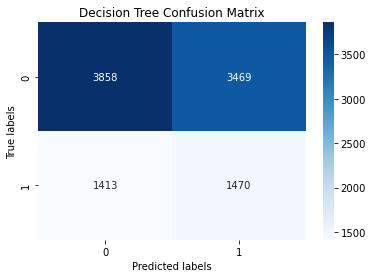

----------------------------------
Elapsed time: 0.06 minutes
Started at:  17:24:37
Model Name:  Random Forest
----------------------------------


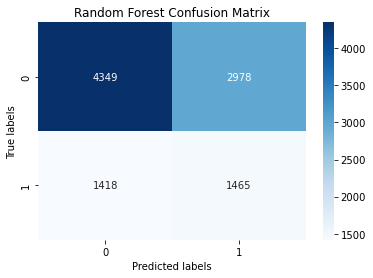

----------------------------------
Elapsed time: 0.67 minutes
Started at:  17:25:18
Model Name:  Gradient Boosting
----------------------------------


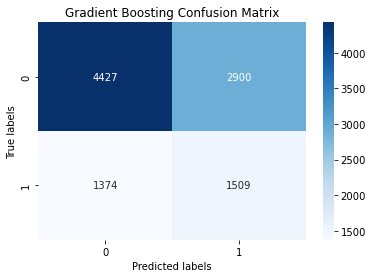

----------------------------------
Elapsed time: 0.72 minutes
Started at:  17:26:01
Model Name:  Neural Network
----------------------------------


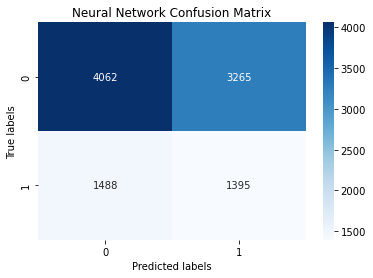

----------------------------------
Elapsed time: 1.11 minutes
Started at:  17:27:07
Model Name:  KNN
----------------------------------


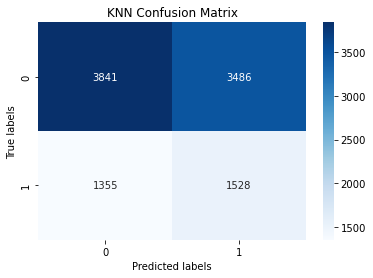

----------------------------------
Elapsed time: 0.20 minutes
Started at:  17:27:20
Model Name:  xgboost
----------------------------------


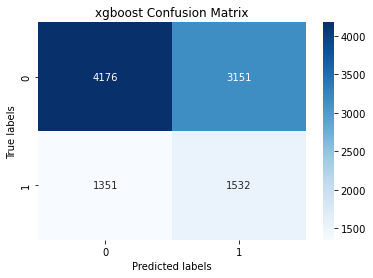

----------------------------------
Elapsed time: 0.04 minutes


In [14]:
# Loop through models
for name, model in models.items():
    start_time = time.time()
    current_time = datetime.now()
    print('Started at: ', current_time.strftime("%H:%M:%S"))
    print('Model Name: ',name)
    print('----------------------------------')
  
    model.fit(X_train_resampled, y_train_resampled)
    
    y_pred = model.predict(X_test_scaled)
    y_scores = model.predict_proba(X_test_scaled)[:, 1]  # Get the probabilities for the positive class
    roc_auc = roc_auc_score(y_test, y_scores)
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    cm = confusion_matrix(y_test, y_pred)
    model_performance[name] = {
        "Accuracy": accuracy,
        "Classification Report": class_report,
        "CV Score": cv_scores.mean(),
        "ROC AUC": roc_auc,
        "Confusion Matrix":cm
    }
    
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'{name} Confusion Matrix')  
    plt.xlabel('Predicted labels') 
    plt.ylabel('True labels')  
    plt.show()
    
    
    print('----------------------------------')
    elapsed_time = (time.time() - start_time) / 60
    print("Elapsed time: {:.2f} minutes".format(elapsed_time))

##### Models Comparison

In [15]:
#model_performance

In [17]:
for model_name, performance in model_performance.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {performance['Accuracy']}")
    print("Classification Report:")
    print(performance['Classification Report'])
    print("cv scores:")
    print(performance['CV Score'])
    print("ROC AUC score:")
    print(performance['ROC AUC'])
    print("Confusion Matrix:")
    print(performance['Confusion Matrix'])
    print("-" * 80)  # Separator for readability

Model: Decision Tree
Accuracy: 0.5987267384916748
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.69      0.71      7327
           1       0.32      0.37      0.34      2883

    accuracy                           0.60     10210
   macro avg       0.53      0.53      0.53     10210
weighted avg       0.62      0.60      0.61     10210

cv scores:
0.5943875774164367
ROC AUC score:
0.5416070950690032
Confusion Matrix:
[[5052 2275]
 [1822 1061]]
--------------------------------------------------------------------------------
Model: Random Forest
Accuracy: 0.6751224289911851
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.87      0.79      7327
           1       0.35      0.18      0.23      2883

    accuracy                           0.68     10210
   macro avg       0.54      0.52      0.51     10210
weighted avg       0.62      0.68      0.64     10210

cv scores:

In [18]:
# Extracting the relevant metrics for DataFrame creation
models, accuracies, precisions, recalls, f1_scores , roc_auc  = [], [], [], [], [] ,[]

for model, metrics in model_performance.items():
    models.append(model)
    
    accuracies.append(metrics['Accuracy'])
    lines = metrics['Classification Report'].split('\n')
    summary_metrics = lines[-2].split()
    precisions.append(float(summary_metrics[2]))
    recalls.append(float(summary_metrics[3]))
    f1_scores.append(float(summary_metrics[4]))
    roc_auc.append(metrics['ROC AUC'])

# Creating the DataFrame
df_report = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1_scores,
    'ROCAUC-Score': roc_auc,
   
})

df_report

,Model,Accuracy,Precision,Recall,F1-Score,ROCAUC-Score
0,Decision Tree,0.598727,0.62,0.60,0.61,0.541607
1,Random Forest,0.675122,0.62,0.68,0.64,0.554579
2,Gradient Boosting,0.713908,0.65,0.71,0.63,0.575649
3,Neural Network,0.576004,0.62,0.58,0.59,0.542768
4,KNN,0.551126,0.61,0.55,0.57,0.527576
5,XGBoost,0.711068,0.65,0.71,0.63,0.583144


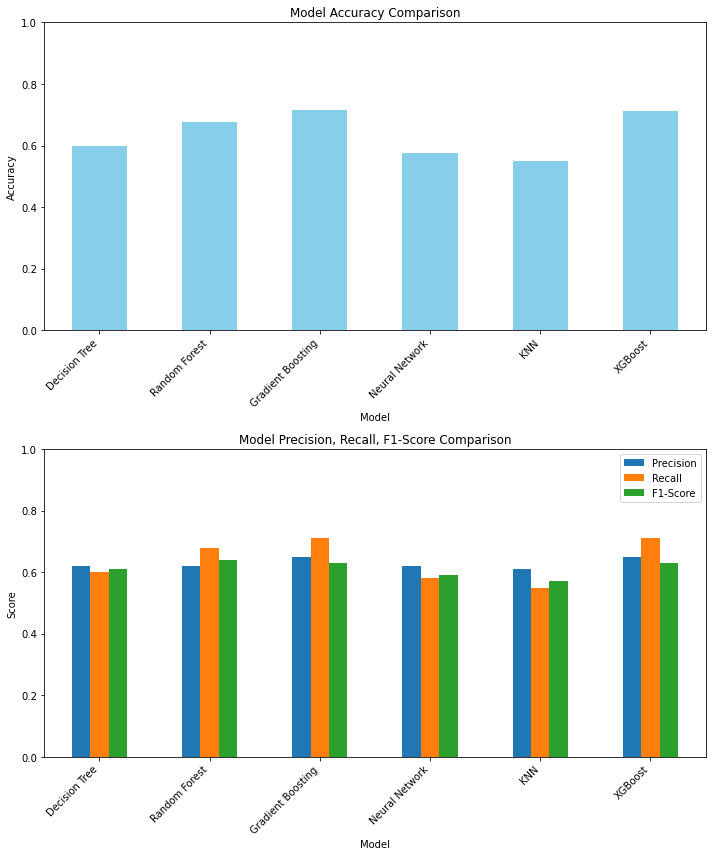

In [19]:
# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Accuracy Plot
df_report.plot(kind='bar', x='Model', y='Accuracy', ax=axs[0], color='skyblue', legend=False)
axs[0].set_title('Model Accuracy Comparison')
axs[0].set_ylabel('Accuracy')
axs[0].set_ylim(0, 1)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')

# Precision, Recall, F1-Score Plot
df_report.plot(kind='bar', x='Model', y=['Precision', 'Recall', 'F1-Score'], ax=axs[1])
axs[1].set_title('Model Precision, Recall, F1-Score Comparison')
axs[1].set_ylabel('Score')
axs[1].set_ylim(0, 1)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

<b>The Gradient Boosting model</b> is the best performer in terms of accuracy , making it a strong candidate for selection. It shows a good balance between precision and recall, especially for class 0 (the majority class).
</br>
Accuracy: 58 %, the highest among the models. </br>
ROC AUC: 60% , showing some ability to discriminate but still limited.

##### Lets see cross validation comparison

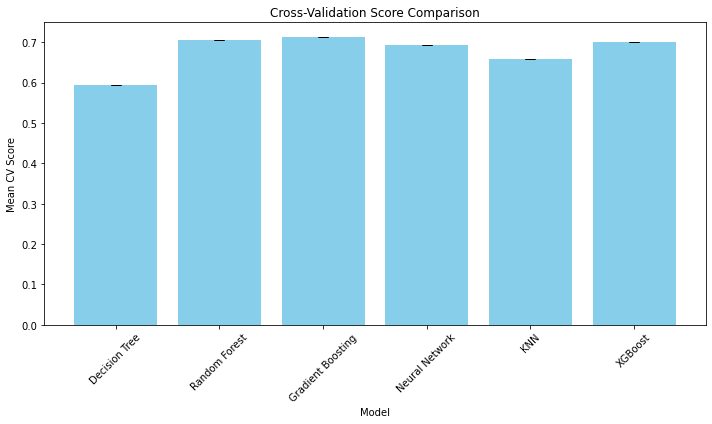

[('Decision Tree', 0.5943875774164367, 0.0),
 ('Random Forest', 0.7047775429102596, 0.0),
 ('Gradient Boosting', 0.7137154528982228, 0.0),
 ('Neural Network', 0.6927777148834918, 0.0),
 ('KNN', 0.6588634781981954, 0.0),
 ('XGBoost', 0.7007616201557425, 0.0)]

In [20]:
model_names = list(model_performance.keys())
cv_scores = [model_performance[model]['CV Score'] for model in model_names]

# Calculate mean and standard deviation of cross-validation scores for each model
cv_means = [np.mean(scores) for scores in cv_scores]
cv_stds = [np.std(scores) for scores in cv_scores]

plt.figure(figsize=(10, 6))
plt.bar(model_names, cv_means, yerr=cv_stds, capsize=5, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean CV Score')
plt.title('Cross-Validation Score Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


list(zip(model_names, cv_means, cv_stds))

Again,<b>Gradient Boosting </b> has Highest performance & consistency with mean score 0.714,and  is the most suitable model for this dataset, showing the best average cross-validation score and consistency. It is closely followed by Random Forest and XGBoost, which also exhibit strong performance.

### Final Best Modeling

In [20]:
final_model = GradientBoostingClassifier(random_state=0)
#final_model = KNeighborsClassifier()
name = "Gradient Boosting Classifier"

# Adding model metadata
final_model.version = '1.0'
final_model.pandas_version = pd.__version__
final_model.numpy_version = np.__version__
final_model.sklearn_version = sklearn_version
final_model.X_columns = [col for col in X_train.columns] 
final_model.build_datetime = datetime.now()

start_time = time.time()
current_time = datetime.now()
print('Started at: ', current_time.strftime("%H:%M:%S"))
print('Model Name: ',name)
print('----------------------------------')
    

#final_model.fit(np.vstack((X_train, X_test)), np.concatenate((y_train, y_test)))
final_model.fit(X_train_resampled, y_train_resampled)

final_pred = final_model.predict(scaler.fit_transform(X))
final_y_prob = final_model.predict_proba(scaler.fit_transform(X))[:, 1]  # Probability of class 1 (churn)
final_roc_auc = roc_auc_score(y, final_y_prob)
final_accuracy = accuracy_score(y, final_pred)
final_class_report = classification_report(y, final_pred)
final_cv_scores = cross_val_score(final_model, X, y, cv=5)
final_cm = confusion_matrix(y,final_pred)

final_model.cv_scores = final_cv_scores
final_model.mean_cv_score = final_cv_scores.mean()

print(f'CV Scores: {final_cv_scores}')
print(f'Average CV Score: {final_cv_scores.mean()}')
print(f'Accurancy: {final_accuracy}')
print(f'ROC AUC: {final_roc_auc}')
print(f'Confusion Matrix: {final_cm}')
print(f'Report: {final_class_report}')


print('----------------------------------')
elapsed_time = (time.time() - start_time) / 60
print("Elapsed time: {:.2f} minutes".format(elapsed_time))

Started at:  17:27:23
Model Name:  Gradient Boosting Classifier
----------------------------------
CV Scores: [0.71576885 0.71469148 0.71339015 0.71299833 0.70849251]
Average CV Score: 0.7130682640741892
Accurancy: 0.5883401571101142
ROC AUC: 0.6094626255223904
Confusion Matrix: [[22023 14313]
 [ 6701  8010]]
Report:               precision    recall  f1-score   support

           0       0.77      0.61      0.68     36336
           1       0.36      0.54      0.43     14711

    accuracy                           0.59     51047
   macro avg       0.56      0.58      0.55     51047
weighted avg       0.65      0.59      0.61     51047

----------------------------------
Elapsed time: 0.87 minutes


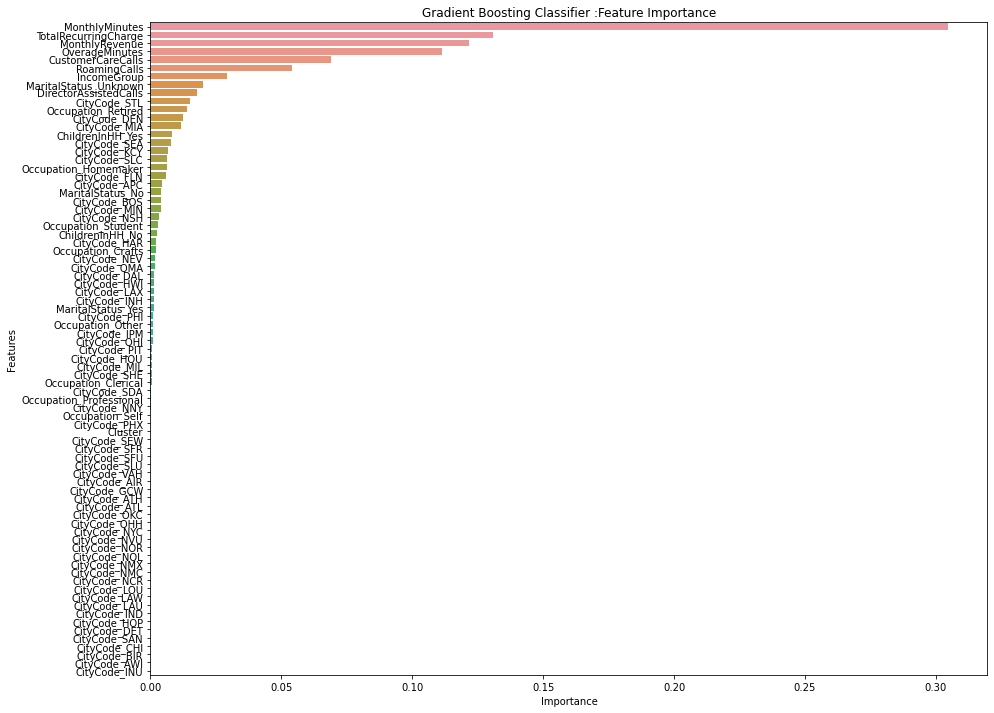

In [21]:
# Visualize Feature Importance
feature_importance = final_model.feature_importances_
feature_names = X_train.columns  # Adjust this based on your feature names

# Sort feature importances in descending order
indices = np.argsort(feature_importance)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 12))
sns.barplot(x=feature_importance[indices], y=feature_names[indices])
plt.title(f'{name} :Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()



<b>Confusion Matrix</b> </br>
True Negative (TN): cm[0, 0] - Actual negatives that were predicted as negative</br>
False Positive (FP): cm[0, 1] - Actual negatives that were predicted as positive</br>
False Negative (FN): cm[1, 0] - Actual positives that were predicted as negative</br>
True Positive (TP): cm[1, 1] - Actual positives that were predicted as positive</br>

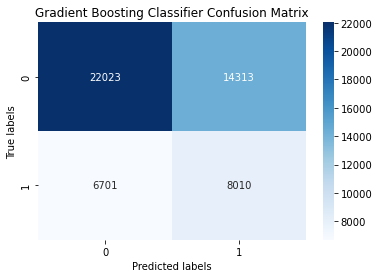

In [22]:
sns.heatmap(final_cm, annot=True, fmt="d", cmap="Blues")
plt.title(f'{name} Confusion Matrix')  
plt.xlabel('Predicted labels') 
plt.ylabel('True labels')  
plt.show()

xAbove Confusion Matrix suggests that the classifier has a high number of false positives, which could be indicative of a low precision. 

The accuracy is moderately high, indicating that the classifier is correct about 58.83% of the time.
The precision is relatively low, meaning that when the classifier predicts an instance as positive, it is only correct about 35.88% of the time.
The recall is higher than precision, which indicates that the classifier is reasonably good at detecting positive instances, identifying about 54.45% of all actual positives.
The F1 score, which balances precision and recall, is not very high, suggesting that the classifier does not achieve an excellent balance between precision and recall.
The specificity is moderately high, indicating that the classifier is fairly good at identifying negative instances, being correct about 60.61% of the time when predicting the negative class.

Lets see ROC curve.

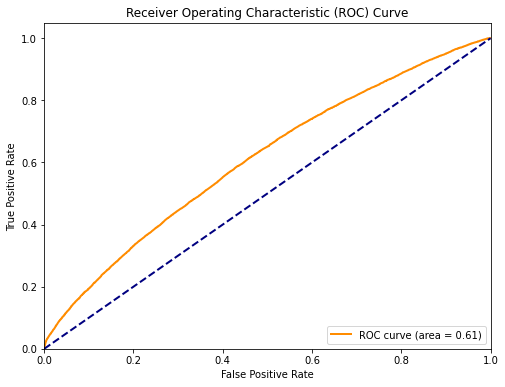

In [23]:
fpr, tpr, thresholds = roc_curve(y, final_y_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

xROC curve with an AUC of 0.52, the predictive model has limited discrimination ability and is only marginally better than random guessing.This suggests that the model is not performing well at distinguishing between the positive and negative classes. Improvements to the model, features, or data quality might be necessary to achieve better classification results.

The AUC value ranges from 0 to 1:

An AUC of 0.5 suggests no discriminative ability, equivalent to random guessing.
An AUC of 1.0 represents perfect discrimination, where the classifier can perfectly differentiate between the two classes.
An AUC less than 0.5 suggests worse than random predictions, but this is typically observed only when there's a problem with the way the classifier is being used.
In your case, the AUC is 0.61, which suggests that the classifier does better than random guessing, but there's still a lot of room for improvement. Typically, an AUC of 0.7 to 0.8 is considered acceptable, while an AUC above 0.8 indicates a very good classifier, depending on the context and application.

In [22]:
final_pred

array([1, 1, 1, ..., 1, 1, 1])

In [24]:
df_pred =X.copy()
df_pred['Churn_Predicted'] = final_pred
df_pred['Churn'] = y

In [25]:
df_pred[df_pred['ChurnPredicted']==0]

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,CustomerCareCalls,IncomeGroup,Cluster,MaritalStatus_No,...,CityCode_SFU,CityCode_SHE,CityCode_SLC,CityCode_SLU,CityCode_STL,CityCode_VAH,ChildrenInHH_No,ChildrenInHH_Yes,Churn_Predicted,Churn
0,24.00,219.0,22.0,0.25,0.0,0.0,0.0,4,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1
3,82.28,1312.0,75.0,1.24,0.0,0.0,4.3,6,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
5,38.05,682.0,52.0,0.25,0.0,0.0,0.7,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
7,62.13,98.0,66.0,2.48,0.0,0.0,4.0,6,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
9,81.00,1056.0,75.0,0.00,0.0,0.0,0.0,5,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51040,71.99,724.0,70.0,0.00,4.0,0.9,0.0,7,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
51042,48.46,366.0,45.0,0.25,3.0,0.0,0.0,6,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1
51043,95.17,1745.0,85.0,0.99,45.0,4.7,0.0,9,2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
51044,48.46,366.0,45.0,0.25,3.0,0.0,1.3,7,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1


In [27]:
prediction = df_pred['ChurnPredicted'].value_counts().sort_index()
prediction

0    28724
1    22323
Name: Churn_Predicted, dtype: int64

##### Save Model File

In [28]:
save_modelfilepath = "../models/final_model.pkl"
with open(save_modelfilepath, 'wb') as file:
    pickle.dump([final_model], file)

#### Post-Classification Analysis

Using churn probabilities from the classification model to further segment customers based on their risk of churning. This segmentation can help in strategizing targeted interventions for different risk groups. </br>
Low Risk (p < 0.3)</br>
Medium Risk (0.3 ≤ p < 0.7)</br>
High Risk (p ≥ 0.7)

In [31]:
risk_segments = np.digitize(final_y_prob, bins=[0.3, 0.7])

#X_risk = X.copy()

df_pred['ChurnProbability'] = final_y_prob
df_pred['RiskSegment'] = risk_segments

# Analyze the distribution of risk segments
risk_segment_distribution = df_pred['RiskSegment'].value_counts().sort_index()
risk_segment_distribution

0       54
1    50150
2      843
Name: RiskSegment, dtype: int64

### Recommandation

Implement Targeted Strategies Based on Risk Segmentation

In [37]:
def implement_targeted_strategies(df):
    # Define strategies for each risk segment
    strategies = {
        0: "Send personalized emails offering discounts or special offers.",
        1: "Engage with customer service for feedback and improvement suggestions.",
        2: "Offer loyalty programs or benefits to enhance customer retention."
    }
    
    df['RetentionStrategy'] = df['RiskSegment'].map(strategies)
    
    # Example: Executing strategies (this could be more complex in practice)
    for segment, strategy in strategies.items():
        customers = df[df['RiskSegment'] == segment]
        print(f"Segment {segment}: {len(customers)} customers")
        print(f"Strategy: {strategy}\n")

In [39]:
implement_targeted_strategies(df_pred)

Segment 0: 54 customers
Strategy: Send personalized emails offering discounts or special offers.

Segment 1: 50150 customers
Strategy: Engage with customer service for feedback and improvement suggestions.

Segment 2: 843 customers
Strategy: Offer loyalty programs or benefits to enhance customer retention.



### Encode the Data

In [40]:
# assume that the prefix before the last underscore in each column name represents the original variable name
# Extract the prefix of each one-hot encoded column

encoded_columns = [col for col in df_pred.columns if '_' in col]  # Consider only columns with '_' in their names
prefixes = set(col.rsplit('_', 1)[0] for col in encoded_columns)
categorical_mappings = {prefix: [col for col in encoded_columns if col.startswith(prefix)] for prefix in prefixes}

categorical_mappings

{'Occupation': ['Occupation_Clerical',
  'Occupation_Crafts',
  'Occupation_Homemaker',
  'Occupation_Other',
  'Occupation_Professional',
  'Occupation_Retired',
  'Occupation_Self',
  'Occupation_Student'],
 'ChildrenInHH': ['ChildrenInHH_No', 'ChildrenInHH_Yes'],
 'CityCode': ['CityCode_AIR',
  'CityCode_APC',
  'CityCode_ATH',
  'CityCode_ATL',
  'CityCode_AWI',
  'CityCode_BIR',
  'CityCode_BOS',
  'CityCode_CHI',
  'CityCode_DAL',
  'CityCode_DEN',
  'CityCode_DET',
  'CityCode_FLN',
  'CityCode_GCW',
  'CityCode_HAR',
  'CityCode_HOP',
  'CityCode_HOU',
  'CityCode_HWI',
  'CityCode_IND',
  'CityCode_INH',
  'CityCode_INU',
  'CityCode_IPM',
  'CityCode_KCY',
  'CityCode_LAU',
  'CityCode_LAW',
  'CityCode_LAX',
  'CityCode_LOU',
  'CityCode_MIA',
  'CityCode_MIL',
  'CityCode_MIN',
  'CityCode_NCR',
  'CityCode_NEV',
  'CityCode_NMC',
  'CityCode_NMX',
  'CityCode_NNY',
  'CityCode_NOL',
  'CityCode_NOR',
  'CityCode_NSH',
  'CityCode_NVU',
  'CityCode_NYC',
  'CityCode_OHH',
 

In [41]:
# Decoding the one-hot encoded columns into the original categorical data
decoded_data = df_pred.copy()

# Note: 'Churn' mapping was mistakenly captured and will be disregarded for the main issue
excluded_churn = {k: v for k, v in categorical_mappings.items() if k != 'Churn'}
decoded_columns = []

for prefix, columns in excluded_churn.items():
    column_name = prefix
    decoded_data[column_name] = decoded_data[columns].idxmax(axis=1).str.replace(f'{prefix}_', '')
    decoded_columns.append(column_name)
    

encoded_columns_to_drop = [col for cols in excluded_churn.values() for col in cols]
decoded_data_preview = decoded_data.drop(columns=encoded_columns_to_drop)
decoded_data_preview

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,CustomerCareCalls,IncomeGroup,Cluster,ChurnPredicted,Churn,ChurnProbability,RiskSegment,RetentionStrategy,Occupation,ChildrenInHH,CityCode,MaritalStatus
0,24.00,219.0,22.0,0.25,0.0,0.0,0.0,4,1,0,1,0.494420,1,Engage with customer service for feedback and ...,Professional,No,SEA,No
1,16.99,10.0,17.0,0.00,0.0,0.0,0.0,5,1,1,1,0.507106,1,Engage with customer service for feedback and ...,Professional,Yes,PIT,Yes
2,38.00,8.0,38.0,0.00,0.0,0.0,0.0,6,1,1,0,0.569524,1,Engage with customer service for feedback and ...,Crafts,Yes,MIL,Yes
3,82.28,1312.0,75.0,1.24,0.0,0.0,4.3,6,0,0,0,0.371988,1,Engage with customer service for feedback and ...,Other,No,PIT,No
4,17.14,0.0,17.0,0.00,0.0,0.0,0.0,9,1,1,1,0.713559,2,Offer loyalty programs or benefits to enhance ...,Professional,No,OKC,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,48.46,366.0,45.0,0.25,3.0,0.0,0.0,6,0,0,1,0.495050,1,Engage with customer service for feedback and ...,Other,No,LAX,Yes
51043,95.17,1745.0,85.0,0.99,45.0,4.7,0.0,9,2,0,0,0.421352,1,Engage with customer service for feedback and ...,Other,Yes,LAX,No
51044,48.46,366.0,45.0,0.25,3.0,0.0,1.3,7,1,0,1,0.471498,1,Engage with customer service for feedback and ...,Clerical,No,LAX,No
51045,48.46,366.0,45.0,0.25,3.0,0.0,0.0,9,1,1,0,0.505694,1,Engage with customer service for feedback and ...,Other,Yes,NEV,No


In [42]:
preddata_filepath = "../data/processed/pred_result.csv"
decoded_data_preview.to_csv(preddata_filepath, index=False) 